In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv("data/03 cars.csv")
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


# Removing irrelevant features

In [3]:
df = df.drop(['Model','Invoice'], axis=1)

In [4]:
df.head()

,Make,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,SUV,Asia,All,"$36,945",3.5,6.0,265,17,23,4451,106,189
1,Acura,Sedan,Asia,Front,"$23,820",2.0,4.0,200,24,31,2778,101,172
2,Acura,Sedan,Asia,Front,"$26,990",2.4,4.0,200,22,29,3230,105,183
3,Acura,Sedan,Asia,Front,"$33,195",3.2,6.0,270,20,28,3575,108,186
4,Acura,Sedan,Asia,Front,"$43,755",3.5,6.0,225,18,24,3880,115,197


# Determining a Proper Model

#### The objective is to predict the MSRP, hence I will use Regression algorithms 

# Features Engineering

In [5]:
df = pd.get_dummies(df, columns=['Make','Origin', 'Type','DriveTrain'])

In [6]:
df = df.dropna()

In [7]:
df.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Origin_USA,Type_Hybrid,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,"$36,945",3.5,6.0,265,17,23,4451,106,189,1,...,0,0,1,0,0,0,0,1,0,0
1,"$23,820",2.0,4.0,200,24,31,2778,101,172,1,...,0,0,0,1,0,0,0,0,1,0
2,"$26,990",2.4,4.0,200,22,29,3230,105,183,1,...,0,0,0,1,0,0,0,0,1,0
3,"$33,195",3.2,6.0,270,20,28,3575,108,186,1,...,0,0,0,1,0,0,0,0,1,0
4,"$43,755",3.5,6.0,225,18,24,3880,115,197,1,...,0,0,0,1,0,0,0,0,1,0


In [8]:
df['MSRP'] = df['MSRP'].map(lambda x: x.lstrip('$').replace(',','.'))

In [9]:
df['MSRP'] = pd.to_numeric(df['MSRP'])

In [10]:
df.head()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,Make_Acura,...,Origin_USA,Type_Hybrid,Type_SUV,Type_Sedan,Type_Sports,Type_Truck,Type_Wagon,DriveTrain_All,DriveTrain_Front,DriveTrain_Rear
0,36.945,3.5,6.0,265,17,23,4451,106,189,1,...,0,0,1,0,0,0,0,1,0,0
1,23.820,2.0,4.0,200,24,31,2778,101,172,1,...,0,0,0,1,0,0,0,0,1,0
2,26.990,2.4,4.0,200,22,29,3230,105,183,1,...,0,0,0,1,0,0,0,0,1,0
3,33.195,3.2,6.0,270,20,28,3575,108,186,1,...,0,0,0,1,0,0,0,0,1,0
4,43.755,3.5,6.0,225,18,24,3880,115,197,1,...,0,0,0,1,0,0,0,0,1,0


In [11]:
X = df.drop('MSRP', axis=1)
y = df['MSRP']
X = X.to_numpy()
y = y.to_numpy()

# Fitting the model

In [12]:
# Importing all the required libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [13]:
# 1- Lasso Regression Model

In [14]:
lasso_reg = linear_model.Lasso(alpha=0.1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)

In [17]:
lasso_pred[1:5]

array([22.74456418, 24.28162243, 32.22045816, 31.05563703])

In [18]:
# 2- Random Forest Regression Model

In [19]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_pred = forest_reg.predict(X_test)

c:\users\moelh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
forest_pred[1:5]

array([20.7679, 25.615 , 35.4042, 29.1125])

In [21]:
# 3- Linear Regression Model

In [22]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)

In [23]:
linear_pred[1:5]

array([23.09477017, 24.34223923, 31.84218447, 29.9466957 ])

# Ploting

In [24]:
# Plotting Lasso Regression

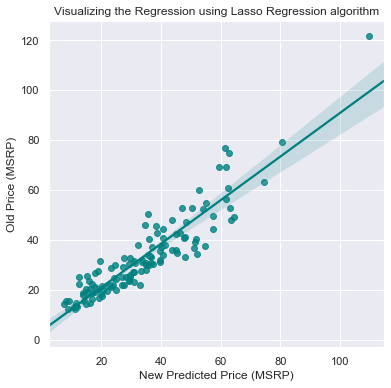

In [25]:
plt.figure(figsize= (6, 6))
plt.title('Visualizing the Regression using Lasso Regression algorithm')
sns.regplot(lasso_pred, y_test, color = 'teal')
plt.xlabel('New Predicted Price (MSRP)')
plt.ylabel('Old Price (MSRP)')
plt.show()

In [26]:
# Plotting Random Forest Regression

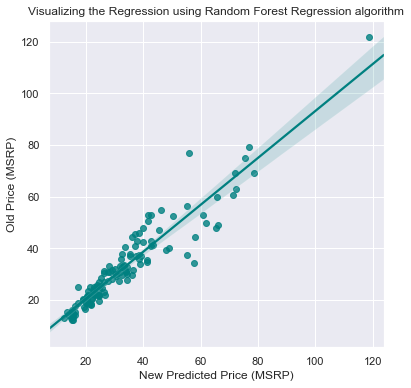

In [27]:
plt.figure(figsize= (6, 6))
plt.title('Visualizing the Regression using Random Forest Regression algorithm')
sns.regplot(forest_pred, y_test, color = 'teal')
plt.xlabel('New Predicted Price (MSRP)')
plt.ylabel('Old Price (MSRP)')
plt.show()

In [28]:
# Plotting Linear Regression

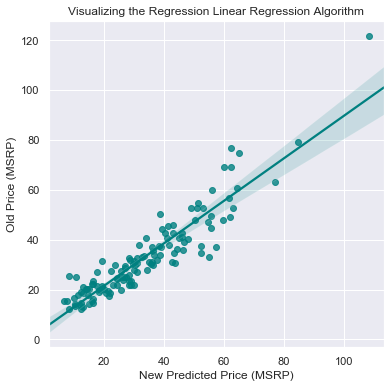

In [29]:
plt.figure(figsize= (6, 6))
plt.title('Visualizing the Regression Linear Regression Algorithm')
sns.regplot(linear_pred, y_test, color = 'teal')
plt.xlabel('New Predicted Price (MSRP)')
plt.ylabel('Old Price (MSRP)')
plt.show()

# The accuracy or the score of the model

In [30]:
print("The R2 square value of Lasso is :", r2_score(y_test, lasso_pred)*100)
print("The R2 square value of Forest is :", r2_score(y_test, forest_pred)*100)
print("The R2 square value of Linear is :", r2_score(y_test, linear_pred)*100)

The R2 square value of Lasso is : 82.69657288601232
The R2 square value of Forest is : 87.80693557955591
The R2 square value of Linear is : 82.4274918097327


# Gradient Boosting Regressor

In [31]:
from sklearn import ensemble

In [190]:
model = ensemble.GradientBoostingRegressor(
    n_estimators=5000,
    learning_rate=0.1,
    max_depth=9,
    min_samples_leaf=3,
    max_features=0.1,
    loss='lad',
    random_state=0
)

In [191]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=9,
                          max_features=0.1, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5000,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [192]:
gradient_pred = model.predict(X_test)

In [193]:
gradient_pred[1:5]

array([21.34114912, 26.18898733, 38.69505118, 29.30796264])

In [194]:
print("The R2 square value of Gradient Boosting is :", r2_score(y_test, gradient_pred)*100)

The R2 square value of Gradient Boosting is : 94.27456220716466


# Saving the model

In [195]:
import joblib

In [196]:
joblib.dump(model, 'trained_car_classifier_model.pkl')

['trained_car_classifier_model.pkl']

# Running the model

In [212]:
classifier = joblib.load('trained_car_classifier_model.pkl')

In [213]:
df.to_csv('data/03 cars ready.csv', index=False)

In [214]:
df.columns

Index(['MSRP', 'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City',
       'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'Make_Acura',
       'Make_Audi', 'Make_BMW', 'Make_Buick', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Chrysler', 'Make_Dodge', 'Make_Ford',
       'Make_GMC', 'Make_Honda', 'Make_Hummer', 'Make_Hyundai',
       'Make_Infiniti', 'Make_Isuzu', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia',
       'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln', 'Make_MINI',
       'Make_Mazda', 'Make_Mercedes-Benz', 'Make_Mercury', 'Make_Mitsubishi',
       'Make_Nissan', 'Make_Oldsmobile', 'Make_Pontiac', 'Make_Porsche',
       'Make_Saab', 'Make_Saturn', 'Make_Scion', 'Make_Subaru', 'Make_Suzuki',
       'Make_Toyota', 'Make_Volkswagen', 'Make_Volvo', 'Origin_Asia',
       'Origin_Europe', 'Origin_USA', 'Type_Hybrid', 'Type_SUV', 'Type_Sedan',
       'Type_Sports', 'Type_Truck', 'Type_Wagon', 'DriveTrain_All',
       'DriveTrain_Front', 'DriveTrain_Rear'],
      dtype='object')

In [219]:
car = [
    2, # EngineSize
    4, #Cylinders
    200, # Horsepower
    24, # MPG_City
    31, # MPG_Highway
    2778, # Weight,
    101, # Wheelbase
    172, # Length
    1, # Make_Acura
    0, # Make_Audi
    0, # Make_BMW
    0, # Make_Buick
    0, # Make_Cadillac
    0, # Make_Chevrolet
    0, # Make_Chrysler
    0, # Make_Dodge
    0, # Make_Ford
    0, # Make_GMC
    0, # Make_Honda
    0, # Make_Hummer
    0, # Make_Hyundai
    0, # Make_Infiniti
    0, # Make_Isuzu
    0, # Make_Jaguar
    0, # Make_Jeep
    0, # Make_Kia
    0, # Make_Land Rover
    0, # Make_Lexus
    0, # Make_Lincoln
    0, # Make_MINI
    0, # Make_Mazda
    0, # Make_Mercedes-Benz
    0, # Make_Mercury
    0, # Make_Mitsubishi
    0, # Make_Nissan
    0, # Make_Oldsmobile
    0, # Make_Pontiac
    0, # Make_Porsche
    0, # Make_Saab
    0, # Make_Saturn
    0, # Make_Scion
    0, # Make_Subaru
    0, # Make_Suzuki
    0, # Make_Toyota
    0, # Make_Volkswagen
    0, # Make_Volvo
    1, # Origin_Asia
    0, # Origin_Europe
    0, # Origin_USA
    0, # Type_Hybrid
    0, # Type_SUV
    1, # Type_Sedan
    0, # Type_Sports
    0, # Type_Truck
    0, # Type_Wagon
    0, # DriveTrain_All
    1, # DriveTrain_Front
    0, # DriveTrain_Rear
]

In [220]:
car_to_value = [
    car
]

In [221]:
predicted_car_value = classifier.predict(car_to_value)

In [222]:
value = predicted_car_value[0]
value

23.81965893250704